# AdaBoost 对房价的预测

In [22]:
from sklearn.model_selection import train_test_split
from sklearn.metrics import mean_squared_error
from sklearn.datasets import load_boston
from sklearn.ensemble import AdaBoostRegressor

# 加载数据
data=load_boston()
print(data.data)
print('-'*30)
print(data.target)
# CRIM -> 城镇人均犯罪率
# ZN -> 住宅用地比例
# INDUS -> 非零售商业用地比例
# CHAS -> 
# NOX -> 一氧化碳浓度
# RM -> 每个住宅的平均房间数
# AGE -> 1940年以前自用房屋的比例
# DIS -> 距离五个波士顿就业中心的加权距离
# RAD -> 距离高速公路的便捷指数
# TAX -> 每一万美元的不动产税率
# PRTATIO -> 该地区教师学生比例
# B -> 该地区黑人比例
# LSTAT -> 中低收入阶层比例

[[6.3200e-03 1.8000e+01 2.3100e+00 ... 1.5300e+01 3.9690e+02 4.9800e+00]
 [2.7310e-02 0.0000e+00 7.0700e+00 ... 1.7800e+01 3.9690e+02 9.1400e+00]
 [2.7290e-02 0.0000e+00 7.0700e+00 ... 1.7800e+01 3.9283e+02 4.0300e+00]
 ...
 [6.0760e-02 0.0000e+00 1.1930e+01 ... 2.1000e+01 3.9690e+02 5.6400e+00]
 [1.0959e-01 0.0000e+00 1.1930e+01 ... 2.1000e+01 3.9345e+02 6.4800e+00]
 [4.7410e-02 0.0000e+00 1.1930e+01 ... 2.1000e+01 3.9690e+02 7.8800e+00]]
------------------------------
[24.  21.6 34.7 33.4 36.2 28.7 22.9 27.1 16.5 18.9 15.  18.9 21.7 20.4
 18.2 19.9 23.1 17.5 20.2 18.2 13.6 19.6 15.2 14.5 15.6 13.9 16.6 14.8
 18.4 21.  12.7 14.5 13.2 13.1 13.5 18.9 20.  21.  24.7 30.8 34.9 26.6
 25.3 24.7 21.2 19.3 20.  16.6 14.4 19.4 19.7 20.5 25.  23.4 18.9 35.4
 24.7 31.6 23.3 19.6 18.7 16.  22.2 25.  33.  23.5 19.4 22.  17.4 20.9
 24.2 21.7 22.8 23.4 24.1 21.4 20.  20.8 21.2 20.3 28.  23.9 24.8 22.9
 23.9 26.6 22.5 22.2 23.6 28.7 22.6 22.  22.9 25.  20.6 28.4 21.4 38.7
 43.8 33.2 27.5 26.5 18.6 19

In [3]:
# 分割数据
train_x, test_x, train_y, test_y = train_test_split(data.data, data.target, test_size=0.25, random_state=33)

In [26]:
# 使用AdaBoost回归模型
regressor = AdaBoostRegressor()
regressor.fit(train_x, train_y)
pred_y = regressor.predict(test_x)
mse = mean_squared_error(test_y, pred_y)
print('房价预测结果', pred_y)
print('均方误差 = ', round(mse, 2))

房价预测结果 [20.32       11.37066667 15.34347826 18.18095238 25.48086957 22.39906542
 28.68546512 18.34309392 28.68546512 20.2025     29.865625   33.34313725
 11.97454545 24.5893617  14.09411765 25.06387097 17.76944444 17.50368421
 28.50733945 25.06387097 18.18095238 18.34309392 18.1125     18.42439024
 30.25625    18.38341969 22.30857143 25.02129964 11.68372093 29.3106383
 17.9969697  26.33416667 10.91333333 21.87953216 25.93303571 29.865625
 25.93303571 11.97454545 14.39142857 25.65048544 15.96       11.97454545
 28.68546512 17.66949153 26.43777778 19.23793103 18.38341969 19.84545455
 26.43777778 19.66100629 18.18095238 33.1        16.17272727 17.58039216
 25.93303571 21.48571429 25.02129964 17.51       25.06387097 22.39666667
 19.28888889 18.18095238 44.05833333 21.83191489 17.76944444 26.43777778
 25.93303571 11.91886792 18.38341969 28.68546512 22.39906542 18.41842105
 18.18095238 27.56938776 19.66100629 46.07901235 16.27272727 11.13684211
 17.50368421 25.02129964 21.04303797 13.2840909

# AdaBoost 与决策树模型的比较

In [49]:
import numpy as np
import matplotlib.pyplot as plt
from sklearn import datasets
from sklearn.metrics import zero_one_loss
from sklearn.tree import DecisionTreeClassifier
from sklearn.ensemble import AdaBoostClassifier

# 设置迭代次数
n_estimators = 200
# 使用
X,y = datasets.make_hastie_10_2(n_samples = 12000, random_state = 1)
# 从12000个数据中取前2000行作为测试集，其余为训练集
train_x, train_y = X[2000:], y[2000:]
test_x, test_y = X[:2000], y[:2000]

# 弱分类器
dt_stump = DecisionTreeClassifier(max_depth = 1,min_samples_leaf = 1)
dt_stump.fit(train_x,train_y)
dt_stump_err = 1.0 - dt_stump.score(test_x, test_y)

# 决策树分类器
dt = DecisionTreeClassifier()
dt.fit(train_x, train_y)
dt_err = 1.0 - dt.score(test_x, test_y)

# AdaBoost分类器
ada = AdaBoostClassifier(base_estimator = dt_stump, n_estimators = n_estimators)
ada.fit(train_x, train_y)


AdaBoostClassifier(base_estimator=DecisionTreeClassifier(max_depth=1),
                   n_estimators=200)

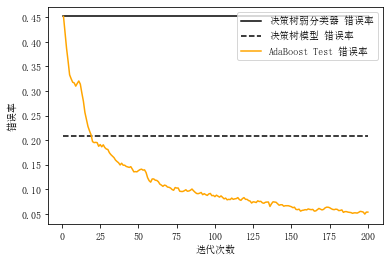

In [62]:
# 三个分类器错误率可视化
fig = plt.figure()

# 设置plt正确显示中文
plt.rcParams['font.sans-serif'] = ['simsun']
ax = fig.add_subplot(111)
ax.plot([1,n_estimators],[dt_stump_err]*2, 'k-', label=u'决策树弱分类器 错误率')
ax.plot([1,n_estimators],[dt_err]*2,'k--', label=u'决策树模型 错误率')
ada_err = np.zeros((n_estimators,))

# 遍历每次迭代的结果 i为迭代次数, pred_y为预测结果
for i,pred_y in enumerate(ada.staged_predict(test_x)): 
    # 统计错误率 
    ada_err[i]=zero_one_loss(pred_y, test_y)
    
# 绘制每次迭代的AdaBoost错误率 
ax.plot(np.arange(n_estimators)+1, ada_err, label='AdaBoost Test 错误率', color='orange')
ax.set_xlabel('迭代次数')
ax.set_ylabel('错误率')
leg=ax.legend(loc='upper right',fancybox=True)
plt.show()